In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv("Mall_Customers.csv")
X = dataset.iloc[:, [3, 4]].values

In [3]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [5]:
np.random.choice(X.shape[0],5,replace=False)

array([130,  99,  17, 163, 145])

In [6]:
X.shape[0]

200

In [7]:
def k_means(X, k, max_iter=100):
    ssd = 0


    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    
    
    iter = 0
    while iter < max_iter:
        

        distances = np.sqrt(((X - centroids.reshape(k, 1, -1))**2).sum(axis=2))
        labels = np.argmin(distances, axis=0)
        

        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        

        if np.all(centroids == new_centroids):
            
            break
            

        centroids = new_centroids
        iter += 1
        
    ssd = np.sum((X - centroids[labels])**2)
    return labels, centroids,ssd

In [8]:


def plot_ssd_curve(X, max_k):

    ssd_values = []

    for k in range(1, max_k + 1):

        ssd = k_means(X, k)[2]

        ssd_values.append(ssd)


    plt.plot(range(1, max_k + 1), ssd_values, marker='o')

    plt.xlabel('Number of clusters')
    plt.ylabel('Sum of squared distances')
    plt.title('Elbow method for k-means clustering')
    plt.show()


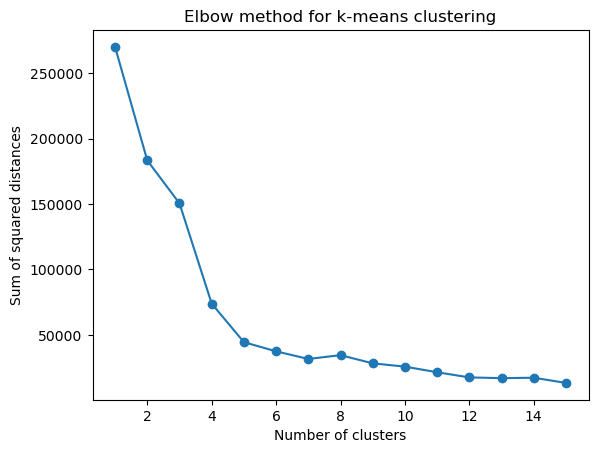

In [9]:
plot_ssd_curve(X,15)

In [10]:
labels, centroids,ssd = k_means(X,5)

In [11]:
labels

array([1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0,
       1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 3, 0, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3], dtype=int64)

In [12]:
centroids

array([[55.0875    , 49.7125    ],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [87.75      , 17.58333333]])

In [13]:
ssd

44454.47647967974

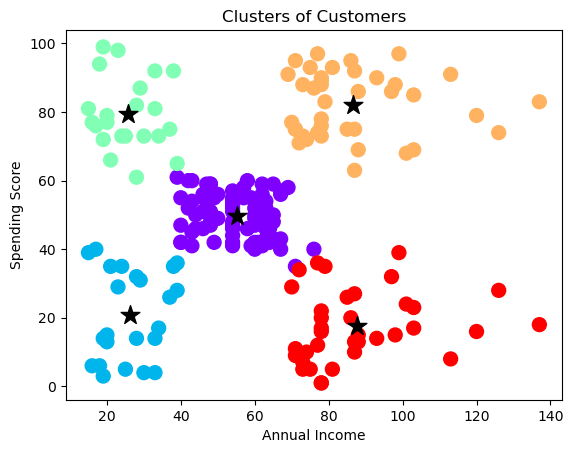

In [14]:
import matplotlib.pyplot as plt



plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow',s=100)

plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='black', s=200)

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Clusters of Customers')



plt.show()


In [15]:
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters = 5, random_state=42)
y_kmeans = kmeans.fit_predict(X)

In [16]:
print(y_kmeans)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [17]:
if centroids.all()==kmeans.cluster_centers_.all():
    print("They're Equal")
else:
    print("False")

They're Equal


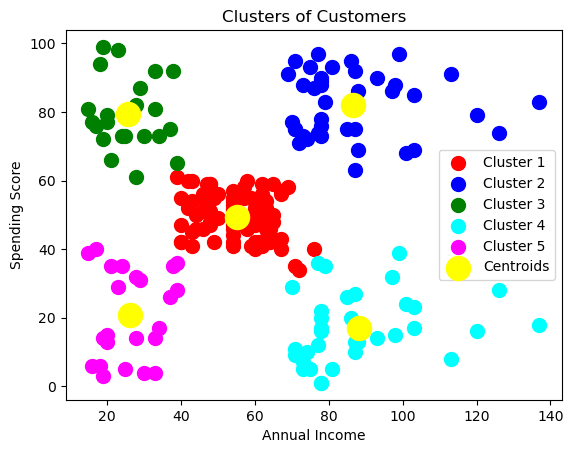

In [18]:
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1], s= 100, c = 'red', label= "Cluster 1")
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1], s= 100, c = 'blue', label= "Cluster 2")
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1], s= 100, c = 'green', label= "Cluster 3")
plt.scatter(X[y_kmeans == 3,0], X[y_kmeans == 3,1], s= 100, c = 'cyan', label= "Cluster 4")
plt.scatter(X[y_kmeans == 4,0], X[y_kmeans == 4,1], s= 100, c = 'magenta', label= "Cluster 5")
plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1], s= 300, c='yellow', label="Centroids")
plt.title("Clusters of Customers")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()

In [19]:
from sklearn.datasets import make_blobs
from validclust import ValidClust
vclust = ValidClust(
    k=5, 
    methods=['kmeans']
)
cvi_vals = vclust.fit_predict(X)
print(cvi_vals)

                            5
method index                 
kmeans silhouette    0.553932
       calinski    247.358993
       davies        0.572563
       dunn          0.058421


In [20]:
from sklearn.metrics import silhouette_score

score_model   = silhouette_score(X, y_kmeans)
score_scratch = silhouette_score(X, labels)

print(f"Scikit Learn Model : {score_model}")
print(f"Scratch Model : {score_scratch}")
print("---------------")
if score_model> score_scratch:
    print("Model is Better")
elif score_model< score_scratch:
    print("Scratch is Better")
else:
    print("Same")

Scikit Learn Model : 0.553931997444648
Scratch Model : 0.5532176107575425
---------------
Model is Better


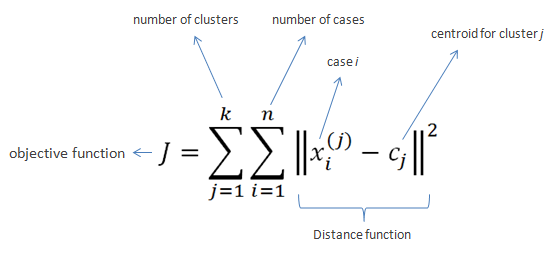

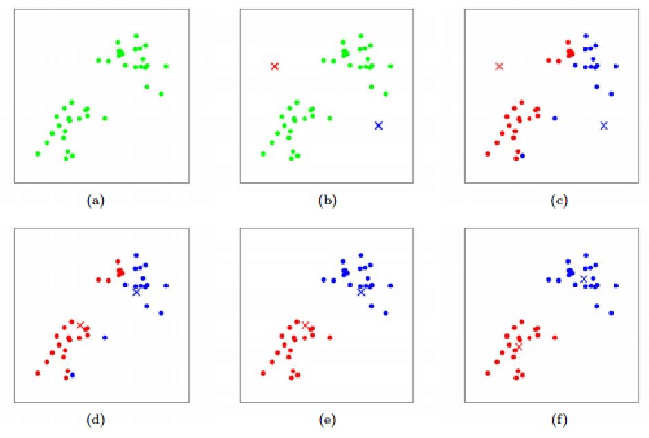

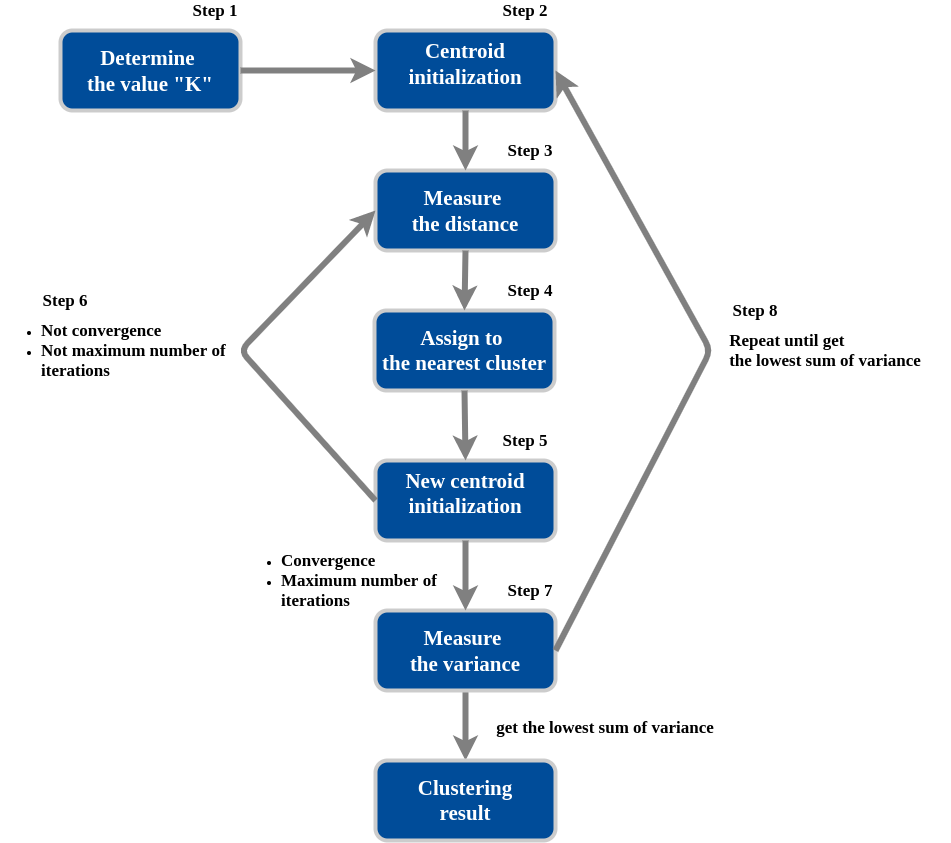